## 决策树绘制函数
- **不仅可用于决策树绘制，还可用于绘制 一切字典嵌套格式的数据**
- **核心思路：递归，具体见代码注释**

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format="retina" 
#设置出图显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode=dict(boxstyle="round4",fc="0.8") #叶节点样式
arrow_args=dict(arrowstyle="->") #设置标注箭头格式，->表示由注解指向外，<-表示指向注解，<->表示双向箭头


#自定义函数，绘制节点注解
def plotNode(nodeText,centerPt,parentPt,nodeType):
    # nodeTxt为要显示的文本，centerPt为文本的中心点，parentPt为指向文本的点 
    createPlot.ax1.annotate(nodeText,xytext=centerPt,textcoords="axes fraction",\
                            xy=parentPt,xycoords="axes fraction",\
                           va="bottom",ha="center",bbox=nodeType,arrowprops=arrow_args)


#自定义函数，在父子节点之间添加文本信息，在决策树中，相当于标注父结点特征的属性值
#cntPt是子节点坐标，parentPt是父节点坐标
def plotMidText(cntrPt,parentPt,nodeText):
    xMid=(parentPt[0]-cntrPt[0])/2+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,nodeText)
    

#自定义函数，是绘制决策树的主力军
def plotTree(decisionTree,parentPt,nodeText):
    cntLeafs=countLeaf(decisionTree)
    depth=countDepth(decisionTree)
    feature=list(decisionTree.keys())[0] #提取当前树的第一个特征
    subDict=decisionTree[feature] #提取该特征的子集，该子集可能是一个新的字典，那么就继续递归调用子集绘制图，否则该特征对应的子集为叶节点
    
    #绘制特征以及该特征属性
    cntrPt=(plotTree.xOff+(1.0+float(cntLeafs))/2.0/plotTree.totalW,plotTree.yOff) #根据整棵树的宽度深度计算当前子节点的绘制坐标
    plotMidText(cntrPt,parentPt,nodeText) #绘制属性
    plotNode(feature,cntrPt,parentPt,decisionNode) #绘制特征
    
    #第一个特征绘制好之后，第二个特征的y坐标向下递减（因为自顶向下绘制，yOff初始值为1.0，然后y递减）
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    
    #遍历当前树的第一个特征的各属性值，判断各属性值对应的子数据集是否为叶节点，是则绘制叶节点，否则递归调用plotTree()，直到找到叶节点
    for key in subDict.keys(): 
        if type(subDict[key]).__name__=="dict":
            plotTree(subDict[key],cntrPt,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW #从左至右绘制，x初始值较小，然后x递增
            plotNode(subDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    #在上述递归调用plotTree()的过程中，yOff会不断被减小
    #当我们遍历完该特征的某属性值(即找到该属性分支的叶节点)，开始对该特征下一属性值判断时，若无下面语句，则该属性对应的节点会从上一属性最小的yOff开始合理
    #下面这行代码，作用是：在找到叶节点结束递归时，对yOff加值，保证下一次判断时的y起点与本次初始y一致
    #若不理解，可以尝试注释掉下面这行语句，看看效果
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD 

    
#绘图主函数
def createPlot(decisionTree):
    fig=plt.figure(figsize=(10,10),facecolor="white")
    fig.clf() #清空画布
    axprops=dict(xticks=[],yticks=[]) #设置xy坐标轴的刻度，在[]中填充坐标轴刻度值，[]表示无刻度
    # createPlot.ax1为全局变量，绘制图像的句柄，subplot为定义了一个绘图
    #111表示figure中的图有1行1列，即1个，最后的1代表第一个图 
    # frameon表示是否绘制坐标轴矩形 
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    
    plotTree.totalW=float(countLeaf(decisionTree)) #全局变量，整棵决策树的宽度
    plotTree.totalD=float(countDepth(decisionTree))#全局变量，整棵决策树的深度
    plotTree.xOff=-0.5/plotTree.totalW
    plotTree.yOff=1.0
    
    plotTree(decisionTree,(0.5,1.0),'')
    plt.show()

### 测试

In [14]:
my_tree={'纹理': {'模糊': '否','清晰': {'根蒂': {'硬挺': '否','稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '是', '软粘': '否'}},'青绿': '是'}},'蜷缩': '是'}},'稍糊': {'触感': {'硬滑': '否', '软粘': '是'}}}}
my_tree

{'纹理': {'模糊': '否',
  '清晰': {'根蒂': {'硬挺': '否',
    '稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '是', '软粘': '否'}}, '青绿': '是'}},
    '蜷缩': '是'}},
  '稍糊': {'触感': {'硬滑': '否', '软粘': '是'}}}}

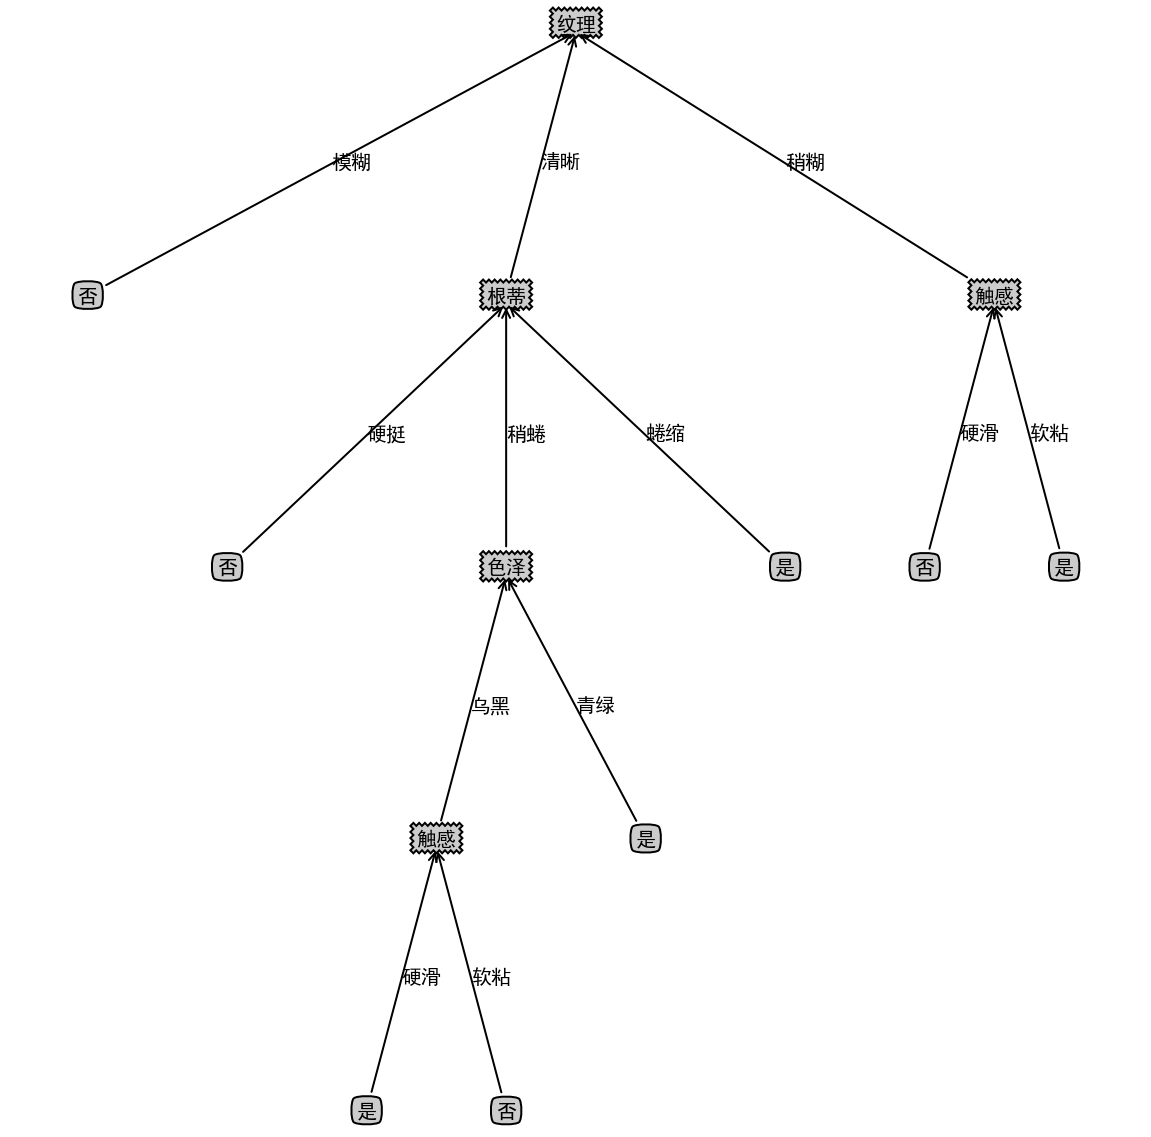

In [15]:
createPlot(my_tree)

***
#### 分块说明：添加注解，annotate()
- 箭头形状等等参数详解：https://matplotlib.org/users/annotations_guide.html

In [1]:
# 练习添加注解
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format="retina" 
#设置出图显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False


decisionNode = dict(boxstyle="sawtooth", fc="0.8")
#decisionNode={boxstyle:"sawtooth",fc:"0.8"} #决策节点样式
leafNode=dict(boxstyle="round4",fc="0.8") #叶节点样式

#设置标注箭头格式，->表示由注解指向外，<-表示指向注解，<->表示双向箭头
arrow_args=dict(arrowstyle="->") 
#arrow_args=dict(facecolor="blue",shrink=0.05) #另一种设置箭头格式的方式

def plotNode(nodeText,centerPt,parentPt,nodeType):
    # nodeTxt为要显示的文本，centerPt为文本的中心点，parentPt为指向文本的点 
    createPlot.ax1.annotate(nodeText,xytext=centerPt,textcoords="axes fraction",\
                            xy=parentPt,xycoords="axes fraction",\
                           va="bottom",ha="center",bbox=nodeType,arrowprops=arrow_args)

def createPlot():
    fig=plt.figure(figsize=(6,6),facecolor="white")
    fig.clf() #清空画布
    
    # createPlot.ax1为全局变量，绘制图像的句柄，subplot为定义了一个绘图
    #111表示figure中的图有1行1列，即1个，最后的1代表第一个图 
    # frameon表示是否绘制坐标轴矩形 
    createPlot.ax1=plt.subplot(111,frameon=False)
    
    plotNode("决策节点",(0.8,0.4),(1.1,0.8),decisionNode)
    plotNode("叶节点",(0.5,0.2),(0.2,0.5),leafNode)
    plt.show()

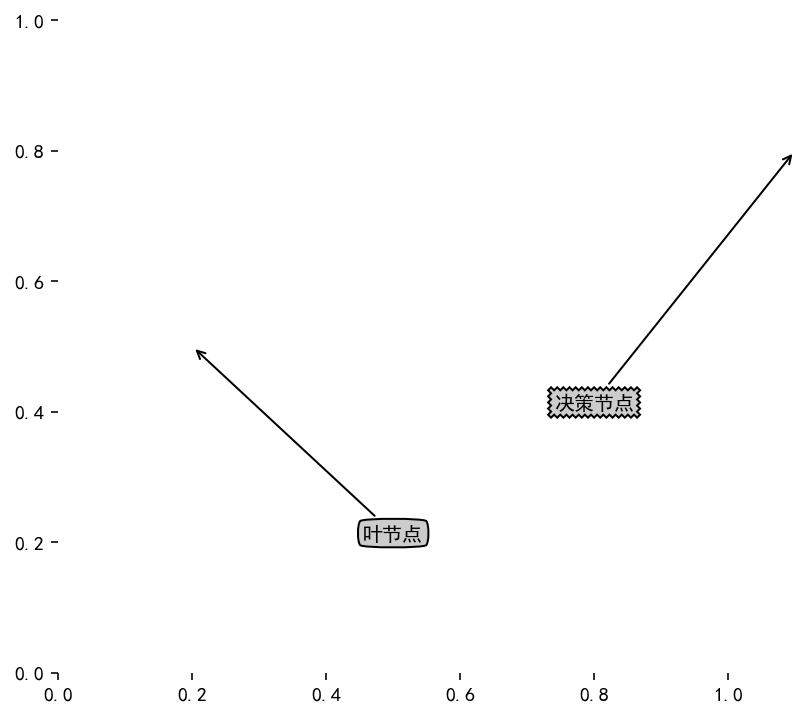

In [2]:
createPlot()

#### 分块说明：获取决策树的叶节点数和层数
- 原理：决策树存放在嵌套的字典中
    - 若key的value为字典，则该节点为决策节点，需要继续下探
    - 若key的value不为字典，则该节点为叶节点

In [3]:
"""
输入：字典嵌套格式的决策树
输出：该决策树的叶节点数，相当于决策树宽度(W)
"""
def countLeaf(desicionTree):
    cntLeaf=0
    firstFeatrue=list(desicionTree.keys())[0] #决策树字典的第一个key是第一个最优特征，为什么要提取这个特征呢，因为后面要遍历该特征的属性值从而找个子树
    subTree=desicionTree[firstFeatrue] #取节点key的value，即子树
    
    for key in list(subTree.keys()): #遍历最优特征的各属性值，每个属性对应一个子树,判断子树是否为叶节点
        if type(subTree[key]).__name__=="dict": 
            #如果当前属性值对应的子树类型为字典，说明这个节点不是叶节点，
            #那么就递归调用自己，层层下探找到该通路叶节点，然后向上求和得到该通路叶节点数
            cntLeaf += countLeaf(subTree[key]) #递归
        else:
            cntLeaf += 1
    return cntLeaf


"""
输入：字典嵌套格式的决策树
输出：该决策树的深度(D)
"""
def countDepth(desicionTree):
    maxDepth=0
    firstFeatrue=list(desicionTree.keys())[0] #当前树的最优特征
    subTree=desicionTree[firstFeatrue]
    
    for key in list(subTree.keys()): #遍历最优特征的各属性值，每个属性对应一个子树,判断子树是否为叶节点
        if type(subTree[key]).__name__=="dict": 
            thisDepth = 1+countDepth(subTree[key]) #这里值得认真思考过程，作图辅助思考
        else:
            thisDepth=1
        if thisDepth>maxDepth:
            maxDepth=thisDepth
    return maxDepth

**决策树深度递归计算过程如下图**
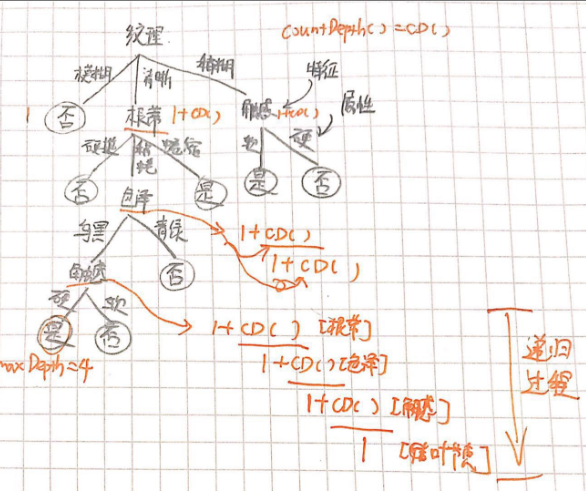